<a href="https://colab.research.google.com/github/LillyLaila/Artificial-intelligence-for-DataScience/blob/main/Lab2.2-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#EE15D'>**SVM**</font>

<font color='#EE15D'>**Questions:**</font>

1.   LinearSVC section: Create 2 models (model1, model2), compare the results after visulizations, Which one is a better classifier for this dataset?
2.   SVC section: Create one model (model3), with SVC and compare it with 2 previous models after visulizations .
1.   Use model3.support_ and model3.n_support_ to determine the number of support vectors in each class in model 3. Visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?
2.   NuSVC section, Create one model (model4) with NuSVC, and compare it with 3 previous models after visulizations.
1.   Visualize model 4 and compare the number of support vector machines with model 3.
2.   Kernel Trick section: Create 3 models (model5, model6, and model7), Visualize the results of the 3 models and interpret them. Which model best fits the data?

<font color='#EE15D'>Note:</font> Proceed through the code, answering the questions one by one in separate cells, each inserted after its corresponding question.






## **🔸 Imports**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font color='#EE15D'>Note:</font>  Before starting, if you are not familiar with scikit-learn or how to import, please study this link.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



## **🔸 SVM (sklearn)**

In [69]:
from sklearn.svm import LinearSVC, SVC, NuSVC

<font color='#EE15D'>We have created a dataset with 1000 samples and 2 classes

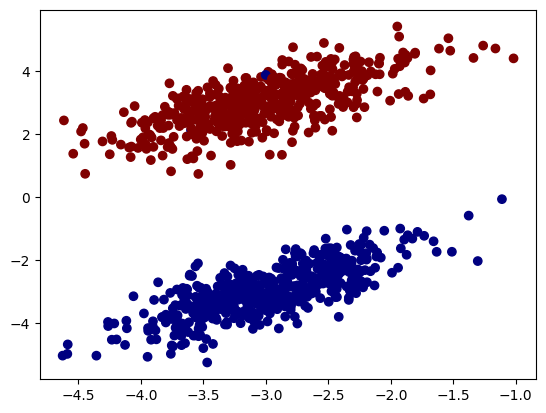

In [70]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>Create 2 models based on the following hyperparameters and compare the results after visulizations:



*   **model1**: LinearSVC, loss= hinge, C=1.2, max_iter=2000
*   **model2**: LinearSVC, loss= squared_hinge, C=2.5, max_iter=1000

<font color='#EE15D'>Which one is a better classifier for this dataset?





Model 1, hingeloss, allows a soft margin and is better because it has a wider margin and is less sensetive to outliers. Slight missclassifications are allowed for better generalisations. (Datapoints inside of margin)

For model 2, it has fewer datapoints inside of the margins because of the C=2.5. The training set might be accurate but the testing set is worse.  

In [71]:
model1 = LinearSVC(loss='hinge', C=1.2, max_iter=2000, random_state=0)
model1.fit(X, y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000, random_state=0)

In [72]:
model2 = LinearSVC(loss='squared_hinge', C=2.5, max_iter=1000, random_state=0)
model2.fit(X, y)

LinearSVC(C=2.5, random_state=0)

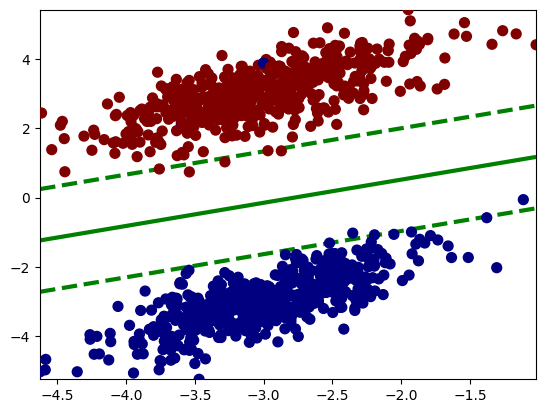

In [73]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model1.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

### `SVC`

<font color='#GG15D'>**Question2:** </font> <font color='#EE15D'>Create one model (model3) with SVC based on the following info and compare it with 2 previous models after visulizations:



*   **model3**: SVC, C=1.0, kernel=linear, probability=True



In [74]:
model3 = SVC(C=1.0, kernel='linear', probability =True, random_state=0)
model3.fit(X, y)

SVC(kernel='linear', probability=True, random_state=0)

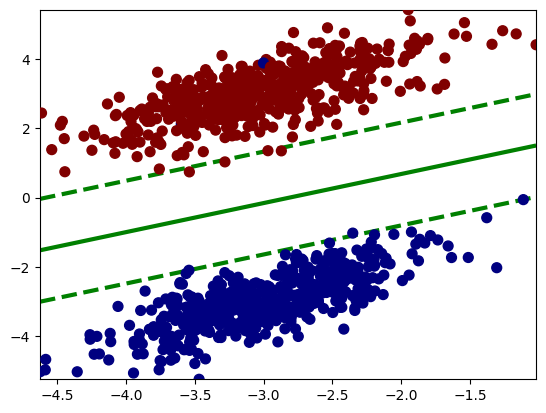

In [75]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


Model 3 is nearly the same as model 1 and 2, because the data is linearly separable, it only allows probabibility estimation.

<font color='#GG15D'>**Question3**:</font> Use <font color='#EE15D'> model3.support_</font> and <font color='#EE15D'>model3.n_support_</font> to determine the number of support vectors in each class. Then, use the code below to visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?

In [76]:
model3.support_, model3.n_support_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930], dtype=int32),
 array([5, 4], dtype=int32))

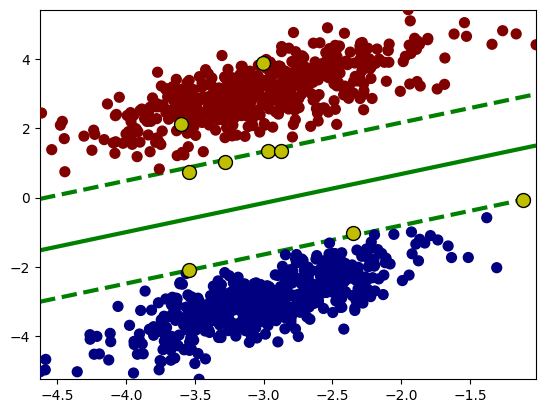

In [77]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
sv = model3.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='y', s=100, edgecolors='k')

Answer: The yellow highlighted points are support vectors located on the margins. Class 1 has 4 vectors near the margin and 2 outside of the margins. Class 2 has 3 vectors on the margin. C = 1.0 meaning its a soft marfin and the support vectors are points to define the decision boundary.

### `NuSVC`

<font color='#GG15D'>**Question4**:</font> <font color='#EE15D'>Create one model (model4) with NuSVC based on the following hyperparameters and compare it with 3 previous models after visulizations:



*   **model4**: NuSVC, nu=0.95, kernel=linear, probability=True


In [78]:
model4 = NuSVC(nu=0.05, kernel='linear', probability=True)
model4.fit(X, y)

NuSVC(kernel='linear', nu=0.05, probability=True)

<font color='#GG15D'>**Question5**:</font> <font color='#EE15D'>Visualize model 4 with the following code and compare the number of support vector machines with model 3.

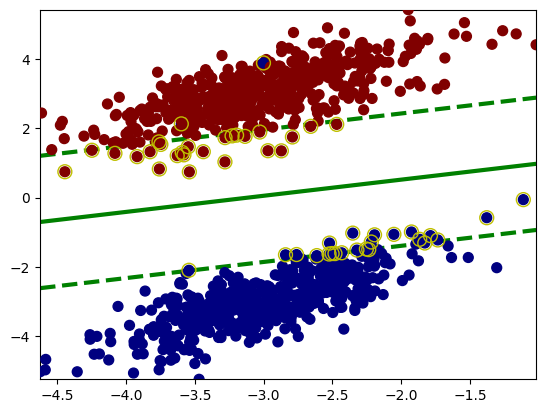

In [79]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model4.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

Model 4 has many more support vectors and this is because nu controls the training errors and support vectors. Nu in this case means that nu=0.95 95% of training points can be support vectors.

## **🔸 Kernel Trick (sklearn)**

<font color='#EE15D'>When the dataset is not linearly separable




In [80]:
from sklearn.svm import SVC

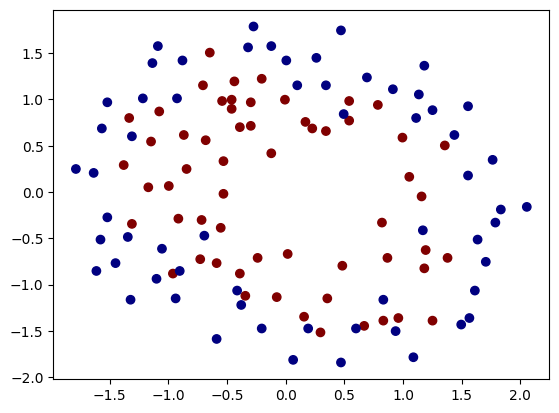

In [81]:
#Load the dataset
data = np.loadtxt('https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab2-Data/ex2data2.txt', delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

<font color='#GG15D'>**Question6**: <font color='#EE15D'>Create 3 models (model5, model6, and model7) with the following hyperparameters:



*   **model5** : SVC, C=1.0, kernel=poly, degree=2, coef0=1
*   **model6** : SVC, C=1.0, kernel=rbf, degree=2, coef0=1
*   **model7** : SVC, C=1.0, kernel=sigmoid, degree=2, coef0=1

<font color='#EE15D'>Visualize the results of the 3 models and interpret them. Which model best fits the data?






In [82]:
model5 = SVC(C=1.0, kernel='poly', degree=2, coef0=1)
model5.fit(X, y)

SVC(coef0=1, degree=2, kernel='poly')

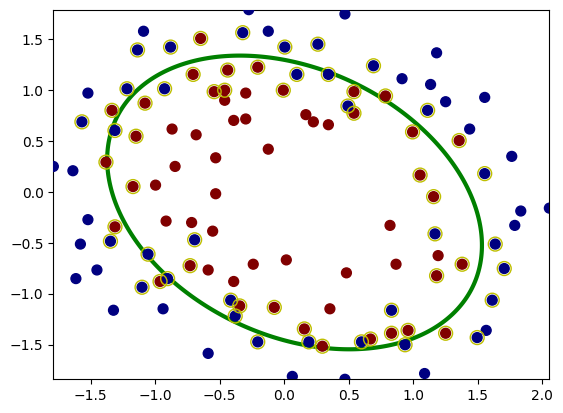

In [83]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model5.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [84]:
model6 = SVC(C=1.0, kernel='rbf', degree=2, coef0=1)
model6.fit(X, y)

SVC(coef0=1, degree=2)

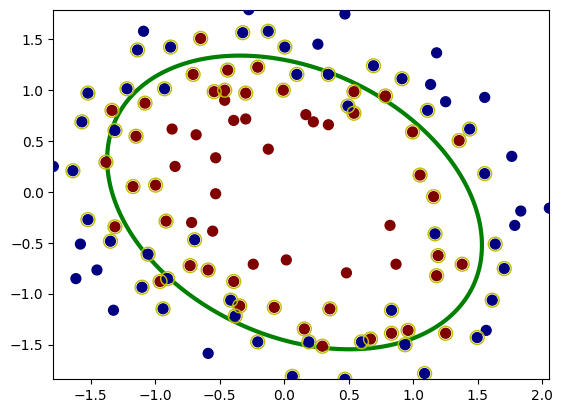

In [85]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model6.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

In [86]:
model7 = SVC(C=1.0, kernel='sigmoid', degree=2, coef0=1)
model7.fit(X, y)

SVC(coef0=1, degree=2, kernel='sigmoid')

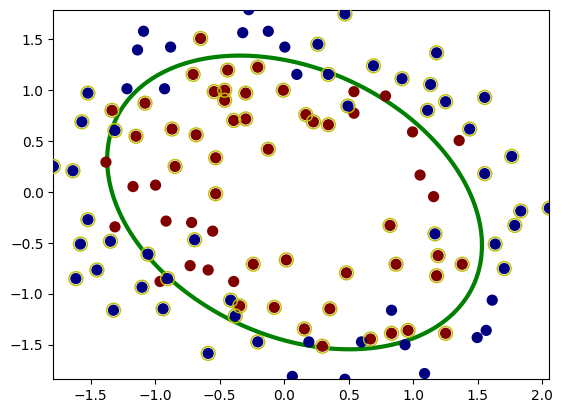

In [87]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model7.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

Model 5 has a kernel tupe of poly and maps data to polynomial feature space (curved boundary).

Model 6 has a gaussian kernel, very flexible.

Model 7 is irregular boundaries.  Some blue observation data are not highlighted in yellow.

The model that best fit the data could be either model 5 or 6.